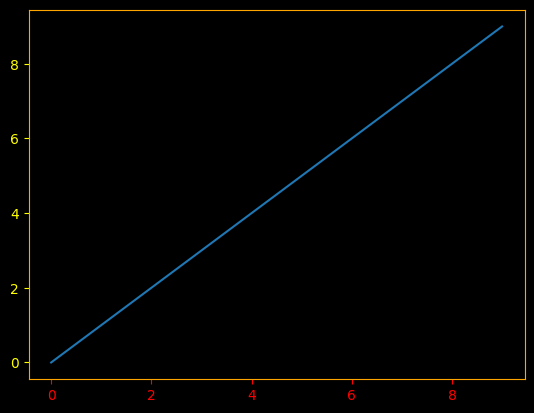

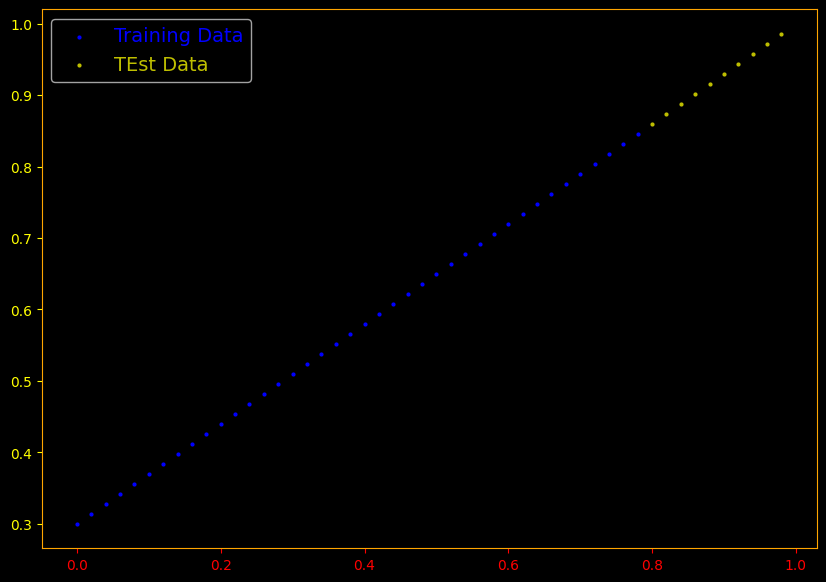

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "figure.facecolor":"black",
    "axes.facecolor":"black",
    "axes.edgecolor":"orange",
    "xtick.color":"red",
    "ytick.color":"yellow",
    "legend.labelcolor":"linecolor"
})
plt.plot(range(10))
# Creating known parameters
weight = .7
bias = .3
# Craet data
start = 0
end = 1
step = .02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias
X[:10], y[:10]

# Creating train/test split
train_split=int(.8*len(X)) # Hence 80% data is used for training set
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Now creating a function to visualize it
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    #plotting trainnnin data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    #plotting test data in yello
    plt.scatter(test_data, test_labels, c="y", s=4, label="TEst Data")
    if predictions is not None:
        # plotting that predictions were made on red color
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size":14})
plot_predictions()

In [3]:
class LinearRegressionoModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weights*x + self.bias
# Setting manual seed since nn.Parameter are arandomly initialized
torch.manual_seed(42)
model_0=LinearRegressionoModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [4]:
# List named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [5]:
# Let's make predictions using torch.inference_mode() method
with torch.inference_mode():
  y_preds = model_0(X_test)

In [6]:
# Checking and prnting the predictinos values
print(f"Number of testing samples:{len(X_test)}")
print(f"Number of predictions made:{len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples:10
Number of predictions made:10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


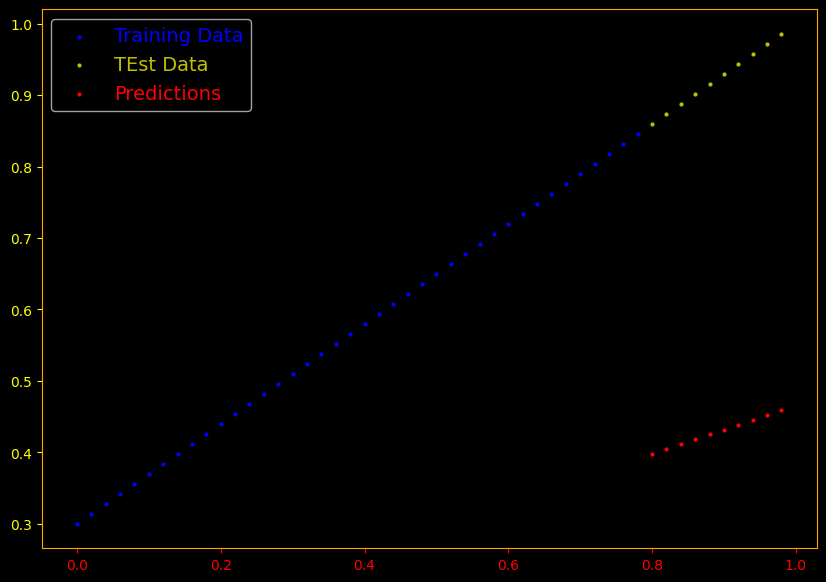

In [7]:
plot_predictions(predictions=y_preds)

In [8]:
y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [9]:
# Creating the loss function
loss_fn=nn.L1Loss() # MAE loss is same as L1Loss
# Creating the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=.01)#learning rate

In [13]:
torch.manual_seed(42)
epochs = 300
# creating tmpty list for tracking values
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  ###Trainning
  model_0.train()
  y_pred = model_0(X_train)
  print(y_pred)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred, y_test.type(torch.float))
    if epoch%10==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Streaming output truncated to the last 5000 lines.
        [0.4661],
        [0.4800],
        [0.4939],
        [0.5078],
        [0.5218],
        [0.5357],
        [0.5496],
        [0.5635],
        [0.5774],
        [0.5913],
        [0.6052],
        [0.6191],
        [0.6330],
        [0.6469],
        [0.6608],
        [0.6747],
        [0.6886],
        [0.7025],
        [0.7164],
        [0.7303],
        [0.7442],
        [0.7581],
        [0.7720],
        [0.7859],
        [0.7998],
        [0.8137],
        [0.8276],
        [0.8415]], grad_fn=<AddBackward0>)
tensor([[0.3093],
        [0.3233],
        [0.3373],
        [0.3513],
        [0.3652],
        [0.3792],
        [0.3932],
        [0.4072],
        [0.4212],
        [0.4351],
        [0.4491],
        [0.4631],
        [0.4771],
        [0.4911],
        [0.5050],
        [0.5190],
        [0.5330],
        [0.5470],
        [0.5610],
        [0.5749],
        [0.5889],
        [0.6029],
        [0.6169],
      

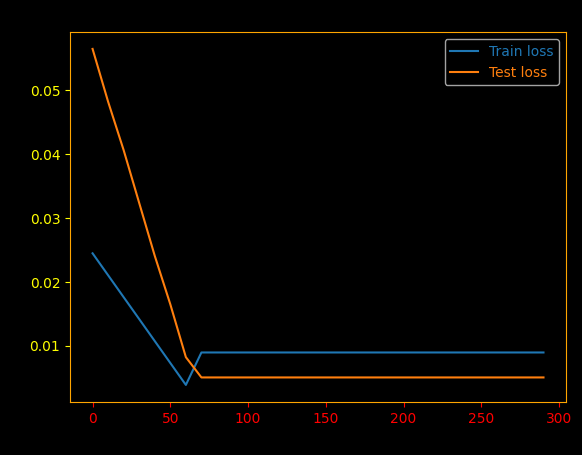

In [14]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epohs")
plt.legend()

In [15]:
# finding our model's learned parameters
print("The model learned the following values for weights and bias: ")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"Weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias: 
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
Weights: 0.7, bias: 0.3


In [16]:
# Making predictions with a trained PyTorch model(inference)
# Setting the model in evaluation model
model_0.eval()
# Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

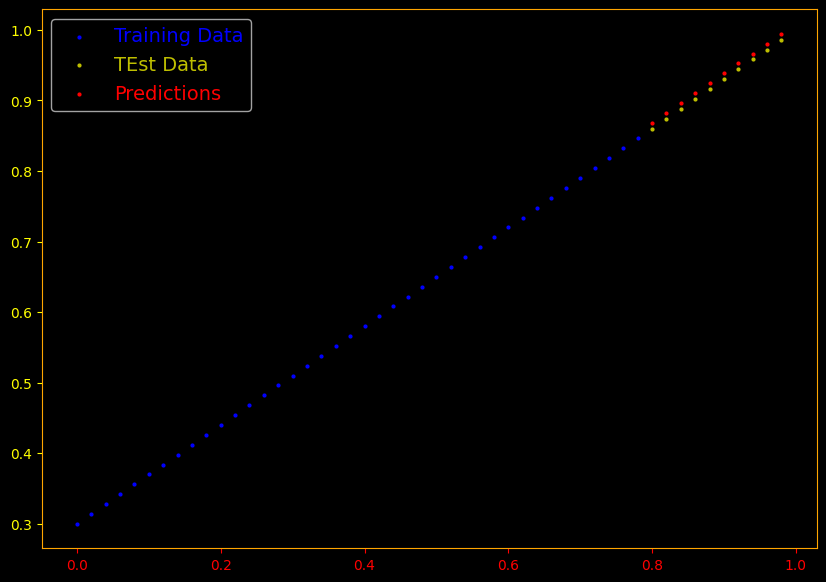

In [17]:
plot_predictions(predictions=y_preds)

In [18]:
from pathlib import Path
# Creating models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# CREATE model save path
MODEL_NAME = "pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
# Saving the model state dict
print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # Only saving the state_dict() only saves the model learneed parameters
           f=MODEL_SAVE_PATH)

Saving model to :models/pytorch_workflow_model.pth


In [19]:
# checking the saved file path
!ls -l models/pytorch_workflow_model.pth

-rw-r--r-- 1 root root 1650 Feb 27 12:57 models/pytorch_workflow_model.pth
